In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = "/content/drive/MyDrive/Audio_Song_Actors_01-24"

In [ ]:
!pip install librosa matplotlib tqdm

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Define paths
output_path = "spectrograms"

# RAVDESS emotion labels
emotion_map = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# Create output directories
os.makedirs(output_path, exist_ok=True)
for emotion in emotion_map.values():
    os.makedirs(os.path.join(output_path, emotion), exist_ok=True)

# Convert audio to spectrogram
for actor in tqdm(os.listdir(data_path), desc="Processing Actors"):
    actor_path = os.path.join(data_path, actor)
    if not os.path.isdir(actor_path): continue

    for filename in os.listdir(actor_path):
        if filename.endswith(".wav"):
            parts = filename.split("-")
            emotion_code = parts[2]
            emotion = emotion_map.get(emotion_code)

            if emotion is None: continue

            audio_file = os.path.join(actor_path, filename)
            y, sr = librosa.load(audio_file)
            S = librosa.feature.melspectrogram(y=y, sr=sr)
            S_dB = librosa.power_to_db(S, ref=np.max)

            # Save spectrogram image
            plt.figure(figsize=(3, 3))
            librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
            plt.axis('off')  # No axis for cleaner image
            save_path = os.path.join(output_path, emotion, filename.replace(".wav", ".png"))
            plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
            plt.close()


Processing Actors: 100%|██████████| 24/24 [02:19<00:00,  5.83s/it]


In [ ]:
emotion_folders = os.listdir("spectrograms")
print("Emotion folders:", emotion_folders)

Emotion folders: ['surprised', 'calm', 'neutral', 'happy', 'sad', 'disgust', 'angry', 'fearful']


In [ ]:
print(os.listdir("spectrograms/happy")[:10])

['03-02-03-01-02-02-13.png', '03-02-03-02-02-02-16.png', '03-02-03-01-01-01-03.png', '03-02-03-02-02-01-12.png', '03-02-03-01-01-02-08.png', '03-02-03-02-02-01-11.png', '03-02-03-01-01-02-05.png', '03-02-03-02-01-01-09.png', '03-02-03-01-02-02-21.png', '03-02-03-02-02-01-22.png']


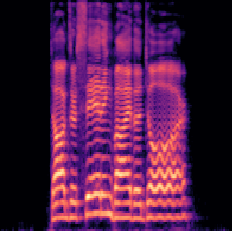

In [ ]:
from IPython.display import Image, display

# Display a specific image (change path if needed)
display(Image("spectrograms/happy/03-02-03-01-02-02-13.png"))

In [ ]:
!cp -r spectrograms /content/drive/MyDrive/